continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.


Using lemonade.csv dataset and focusing on continuous variables:


Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?


Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:


Use a 2 sigma decision rule to isolate the outliers.


Do these make sense?


Should certain outliers be kept or removed?


Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv




In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [7]:
def get_lower_and_upper_bounds(col, multiplier):
    '''This function takes in two arguments and returns upper and lower bounds based on a selected multiplier.'''
    # get the lower quartile
    q1 = df[col].quantile(0.25)
    # get the upper quartile
    q3 = df[col].quantile(0.75)
    # calculate the interquartile range
    iqr = q3 - q1
    # get the lower fence
    lower_fence = q1 - (multiplier * iqr)
    # get the upper fence
    upper_fence = q3 + (multiplier * iqr)
    # return a dataframe of outliers
    return lower_fence, upper_fence

In [8]:
def get_outliers(col, multiplier):
    '''This function takes in two arguments and returns a dataframe of quartile outliers based on a selected multiplier.'''
    # get the lower quartile
    q1 = df[col].quantile(0.25)
    # get the upper quartile
    q3 = df[col].quantile(0.75)
    # calculate the interquartile range
    iqr = q3 - q1
    # get the lower fence
    lower_fence = q1 - (multiplier * iqr)
    # get the upper fence
    upper_fence = q3 + (multiplier * iqr)
    # return a dataframe of outliers
    return df[(df[col] < lower_fence) | (df[col] > upper_fence)]

In [9]:
# lemonade dataset
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

In [10]:
# acquire dataset
df = pd.read_csv(url)

In [11]:
# examine first five rows
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [12]:
# examine column names, datatypes, observation count, and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [13]:
# get descriptive info for numerical columns
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


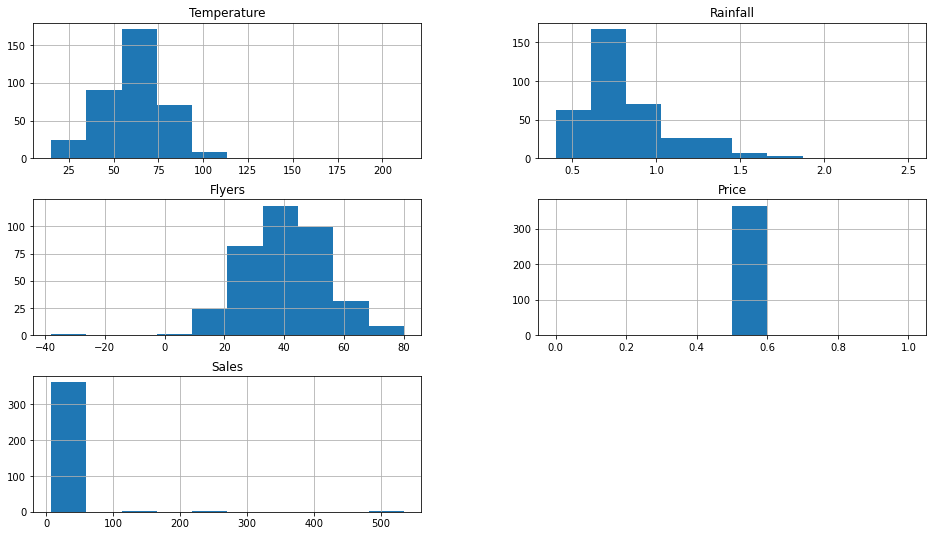

In [14]:
# plot histograms for each numerical column
df.hist(figsize=[16,9])
plt.show()

In [18]:
# Tukey's method for upper and lower bounds for temp with a 1.5 multiplier
get_lower_and_upper_bounds('Temperature', 1.5)

(16.700000000000003, 104.7)

In [17]:
# list outliers for temp at 1.5 multiplier
get_outliers('Temperature', 1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


The upper outlier looks like a typo. It would make sense to drop or impute this with the previous day or next day's temperature.

In [19]:
# Tukey's method for upper and lower bounds for rain with a 1.5 multiplier
get_lower_and_upper_bounds('Rainfall', 1.5)

(0.26, 1.3)

In [20]:
# list outliers for rain at 1.5 multiplier
get_outliers('Rainfall', 1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


It doesn't make sense to remove this many observations as outliers on a small dataset like this. The rainfall minimum and maximum are fairly close together; 1.5 multiplier is not adequate.

In [21]:
# Tukey's method for upper and lower bounds for flyers with a 1.5 multiplier
get_lower_and_upper_bounds('Flyers', 1.5)

(4.0, 76.0)

In [22]:
# list outliers for flyers at 1.5 multiplier
get_outliers('Flyers', 1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


It would make sense to drop these outliers.

In [23]:
# Tukey's method for upper and lower bounds for price with a 1.5 multiplier
get_lower_and_upper_bounds('Price', 1.5)

(0.5, 0.5)

In [24]:
# Tukey's method for upper and lower bounds for sales with a 1.5 multiplier
get_lower_and_upper_bounds('Sales', 1.5)

(5.0, 45.0)

In [25]:
# list outliers for sales at 1.5 multiplier
get_outliers('Sales', 1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


All of these observations are very far from the mean. These might be typos, but these sales occurred around Independence Day, so if this is a US lemonade stand, there could very well be an extraordinary increase in sales.

In [26]:
# Tukey's method for upper and lower bounds for temp with a 3 multiplier
get_lower_and_upper_bounds('Temperature', 3)

(-16.299999999999997, 137.7)

In [27]:
# list outliers for temp at 3 multiplier
get_outliers('Temperature', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


It was obviously not boiling in February; data error.

In [28]:
# Tukey's method for upper and lower bounds for rain with a 3 multiplier
get_lower_and_upper_bounds('Rainfall', 3)

(-0.13, 1.69)

In [29]:
# list outliers for rain at 3 multiplier
get_outliers('Rainfall', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


This is much more manageable than the 1.5 multiplier result. I would probably keep these outliers though, because there could be a relationship between rainfall and sales. Also, these rainfall amounts are perfectly reasonable.

In [30]:
# Tukey's method for upper and lower bounds for flyers with a 3 multiplier
get_lower_and_upper_bounds('Flyers', 3)

(-23.0, 103.0)

In [31]:
# list outliers for flyers at 3 multiplier
get_outliers('Flyers', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


I would definitely either drop this or remove the negative; this is probably a data entry error

In [33]:
# Tukey's method for upper and lower bounds for price with a 3 multiplier
get_lower_and_upper_bounds('Price', 3)

(0.5, 0.5)

In [36]:
# Tukey's method for upper and lower bounds for sales with a 3 multiplier
get_lower_and_upper_bounds('Sales', 3)

(-10.0, 60.0)

In [35]:
# list outliers for sales with 3 multiplier
get_outliers('Sales', 3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


These are extreme outliers, but they all build up toward a holiday.

In [52]:
# make a function to get outliers with a z-score above 2 standard deviations
def two_sigma(x):
    '''This function takes in a dataframe column and returns the values for outliers beyond two standard deviations.'''
    # calculate z-scores and save to a variable
    zscores = pd.Series((x - x.mean()) / x.std())
    # return outliers
    return x[zscores.abs() >= 2]

In [53]:
# make a function to get outliers with a z-score above 3 standard deviations
def three_sigma(x):
    '''This function takes in a dataframe column and returns the values for outliers beyond three standard deviations.'''
    # calculate z-scores and save to a variable
    zscores = pd.Series((x - x.mean()) / x.std())
    # return outliers
    return x[zscores.abs() >= 3]

In [54]:
two_sigma(df.Temperature)

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [56]:
two_sigma(df.Rainfall)

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

In [57]:
two_sigma(df.Flyers)

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64

The two standard deviations method is not a good method for finding outliers in this case because it includes many observations that would normally occur; eliminating these would mean discarding valuable data.

In [58]:
three_sigma(df.Temperature)

41    212.0
Name: Temperature, dtype: float64

In [59]:
three_sigma(df.Rainfall)

0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [60]:
three_sigma(df.Flyers)

324   -38
Name: Flyers, dtype: int64

The three sigma method is a much better method for targeting outliers in this case because it captured the obvious anomalies without isolating too many observations. The rainfall observations should be kept because although they are outliers, they are probably accurate data observations that need to be considered. The other outliers here look like typos. These should either be imputed or discarded.